Notebook created by Alex H. Chen and Venkata Patchigolla

# What is Linear Regression?

Linear regression is used for applications in which one is trying to predict a scalar value. 

**Simple Linear Regression**

y=mx+b

**Multiple Linear Regression**

y=a<sub>1</sub>x<sub>1</sub>+a<sub>2</sub>x<sub>2</sub>+a<sub>3</sub>x<sub>3</sub>+a<sub>4</sub>x<sub>4</sub>+...+b

**Examples**

*   Household income
*   Sales
*   Height
*   Weight

# What is Logistic Regression?

Recall that linear regression is used for predicting scalar values. For linear regression the output of the model is always a scalar. For logistic regression, on the other hand, the output is a 0 or 1. This makes logistic regression most suitable for classification.

**Examples**
*   Purchasing a particular product
*   Credit card fraud
*   Defaulting on a loan
*   Spam detection



# Introduction to Scikit-Learn

Scikit-learn is a Python library that contains the vast majority of popular machine learning algorithms. Scikit-learn is built on NumPy, SciPy, and matplotlib.

## Install Scikit-learn

*On Windows or Mac*

pip install -U scikit-learn

*On Linux*

pip3 install -U scikit-learn

In [ ]:
# Run shell commands in Jupyter Notebooks with the "!" symbol
!pip install -U scikit-learn
!pip install pandas

# Simple Linear Regression Example

Recall that a simple linear regression is simply the equation of a straight line with two variables: x and y.

y=mx+b

Thus, we are essentially trying to find a best fit line with the most accurate intercept and slope to model the data. This could also be done in Excel without any code.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the **student_scores** dataset. The dataset has two columns: hours and scores. 

*   Hours: the number of hours a student spent preparing for the exam
*   Score: the score (out of 100) that the student earned on the exam

Our goal is to predict any student's exam score given his or her number of hours of preparation.



In [ ]:
# Change the file path to reflect the location of the CSV file.
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('gdrive/My Drive/student_scores.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Let's start by exploring the data.

In [ ]:
df.shape

(25, 2)

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


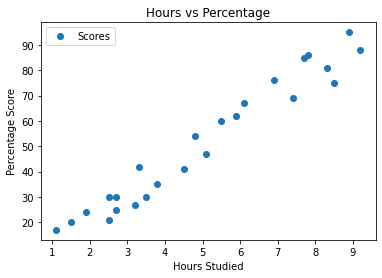

In [ ]:
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(reg.intercept_)

2.018160041434662


In [ ]:
print(reg.coef_)

[9.91065648]


In [ ]:
y_pred = reg.predict(X_test)

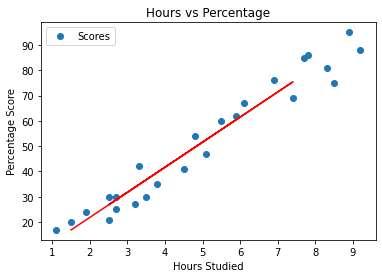

In [ ]:
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

plt.plot(X_test, y_pred, color='red')
plt.show()

In [ ]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


# Multiple Linear Regression Example

Recall that multiple linear regression is simply linear regression with more x variables. It is **NOT** polynomial regression or running simple linear regression multiple times.

y=a<sub>1</sub>x<sub>1</sub>+a<sub>2</sub>x<sub>2</sub>+a<sub>3</sub>x<sub>3</sub>+a<sub>4</sub>x<sub>4</sub>+...+b

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the **petrol_consumption** dataset. The dataset has five columns: petrol_tax, average_income, paved_highways, Population_Driver_licence, and petrol_consumption. The dataset measures the consumption of petrol in 48 states for one specific year.

*   petrol_tax: the tax on petrol measuring in cents per gallon
*   average_income: the average income the state per capita measured in dollars
*   paved_highways: the miles of paved highways in the state
*   proportional_driver_license: the proportion of individuals in the area with driver's licenses
*   petrol_consumption: the consumption of petrol in the state measured in millions of gallons


In [ ]:
# Change the file path to reflect the location of the CSV file.
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('gdrive/My Drive/petrol_consumption.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Let's begin by exploring the data.

In [ ]:
df.shape

(48, 5)

In [ ]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [ ]:
X = df[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = df['Petrol_Consumption']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coeff_df = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 56.8222474789647
Mean Squared Error: 4666.344787588362
Root Mean Squared Error: 68.31064915215168


# Logistic Regression Example

Recall that logistic regression is primarily used for classification.

In [ ]:
from sklearn.linear_model import LogisticRegression

Import the digits dataset, which contains 1797 black and white, 8 by 8 images of integers 0-9.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
df=pd.DataFrame(digits.data)

Let's begin by exploring the dataset.

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,10.382304,11.979410,10.279354,8.175849,1.846411,0.107958,0.002782,2.601558,9.903172,6.992766,7.097941,7.806344,1.788536,0.050083,0.001113,2.469672,9.091263,8.821369,9.927101,7.551475,2.317752,0.002226,0.0,2.339455,7.667223,9.071786,10.301614,8.744018,2.909293,0.0,0.008904,1.583751,6.881469,7.228158,7.672231,8.236505,3.456316,0.027268,0.007234,0.704508,7.506956,9.539232,9.416249,8.758486,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,5.421456,3.977543,4.782681,6.052960,3.586321,0.827915,0.062368,3.576301,5.690767,5.802662,6.175729,6.197322,3.259870,0.438597,0.033352,3.146532,6.192038,5.882936,6.152093,5.872556,3.686456,0.047140,0.0,3.480372,6.324687,6.268391,5.933490,5.870648,3.537283,0.0,0.145185,2.981816,6.537955,6.441378,6.259511,5.695527,4.330951,0.307356,0.204223,1.746153,5.644496,5.226948,5.302048,6.031154,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,9.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,6.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,13.000000,11.000000,9.000000,0.000000,0.000000,0.000000,1.000000,12.000000,6.000000,6.000000,8.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,12.000000,7.000000,0.000000,0.000000,0.0,0.000000,8.000000,10.000000,13.000000,10.000000,1.000000,0.0,0.000000,0.000000,6.000000,7.000000,8.000000,9.000000,1.000000,0.000000,0.000000,0.000000,8.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,15.000000,16.000000,15.000000,14.000000,2.000000,0.000000,0.000000,4.000000,15.000000,12.000000,13.000000,14.00

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.20, random_state=0)

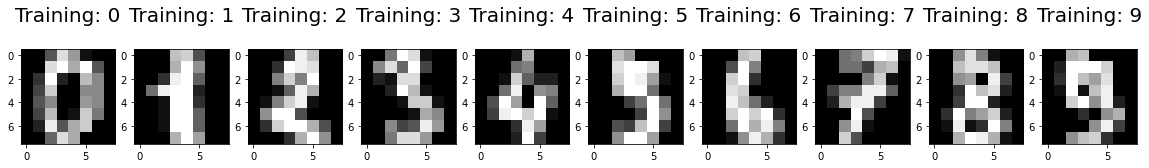

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
  plt.subplot(1, 10, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
reg=LogisticRegression()

In [ ]:
reg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred=reg.predict(x_test)

In [ ]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df2

,Actual,Predicted
0,2,2
1,8,8
2,2,2
3,6,6
4,6,6
...,...,...
355,5,5
356,4,4
357,3,3
358,8,8


In [ ]:
reg.score(x_test, y_test)

0.9666666666666667

## Random Forest Tree Classifier

The random forest is a classification algorithm consisting of many decisions trees.



In [ ]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd

digits = load_digits()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.20, random_state=0)

#Classifier
clf = RandomForestClassifier(n_estimators=1)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_test_predicted = clf.predict(x_test)
y_test_predicted

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 1, 6, 6, 6, 6, 9, 0, 5, 8, 8, 7,
       2, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 1, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 8, 4, 0, 5, 1, 6, 3, 0, 3, 3, 4, 2, 2,
       2, 4, 8, 1, 8, 3, 5, 1, 2, 8, 2, 3, 9, 7, 2, 3, 6, 0, 9, 5, 7, 8,
       1, 2, 3, 9, 3, 1, 1, 7, 4, 8, 5, 1, 5, 5, 3, 5, 9, 0, 7, 1, 4, 1,
       3, 8, 8, 9, 7, 9, 4, 0, 6, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 8, 7, 5, 6, 2, 2, 6, 9, 6, 1, 5, 1, 4, 9, 9, 9, 9, 3,
       6, 1, 4, 9, 4, 7, 6, 7, 6, 8, 6, 0, 8, 8, 9, 6, 5, 1, 6, 4, 1, 6,
       3, 3, 6, 4, 4, 2, 6, 3, 8, 3, 3, 3, 0, 6, 7, 5, 4, 1, 0, 4, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 9, 3, 3, 2, 9, 5, 3, 2, 3, 4, 6, 1, 3, 6, 9,
       2, 4, 8, 3, 7, 6, 2, 9, 3, 0, 6, 9, 3, 6, 3, 8, 3, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 2, 7, 2, 7, 9, 9, 7, 0, 9, 3, 6, 8,
       9, 7, 7, 3, 8, 8, 3, 6, 4, 1, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       8, 8, 2, 4, 6, 9, 4, 4, 4, 3, 4, 6, 5, 9, 0,

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, f1_score

index_array = [
               ['Predicted Values']*10,
               range(10)
]
index_tuples = list(zip(*index_array))
index = pd.MultiIndex.from_tuples(index_tuples)

column_array = [
               ['Actual Values']*10,
               range(10)
]
column_tuples = list(zip(*column_array))
column = pd.MultiIndex.from_tuples(column_tuples)

pd.DataFrame(confusion_matrix(y_test, y_test_predicted), index=index, columns=column)

Actual Values                                    
                               0   1   2   3   4   5   6   7   8   9
Predicted Values 0            20   0   2   0   1   0   2   0   2   0
                 1             1  29   1   2   0   0   0   0   0   2
                 2             1   1  26   5   0   1   1   0   1   0
                 3             0   0   1  24   0   1   0   0   2   1
                 4             0   0   0   0  25   0   0   3   1   1
                 5             0   2   1   1   3  22   1   0   6   4
                 6             1   1   0   1   1   1  39   0   0   0
                 7             0   2   0   0   3   0   1  33   0   0
                 8             0   5   3   1   4   0   2   0  24   0
                 9             0   0   1   2   1   1   0   0   3  33

In [ ]:
f1_score(y_test, y_test_predicted, average='weighted')

0.7628529777626711

In [ ]:
# Hyper-parameter tuning
# 2 methods -> Grid Search and Random Search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Grid Search is exhaustive
parameters = {
    'n_estimators': [50, 100, 150],
    'min_samples_split': [2,3,4,5],
    'criterion': ['gini', 'entropy'],
    'max_depth': [50, 100, None]
}

random_forest = RandomForestClassifier()

clf = GridSearchCV(random_forest, parameters)
clf.fit(x_train, y_train)


KeyboardInterrupt: ignored

In [ ]:
clf.best_params_ #get_params()

{'criterion': 'entropy',
 'max_depth': 50,
 'min_samples_split': 3,
 'n_estimators': 150}

In [ ]:
# Grid Search is exhaustive
parameters = {
    'n_estimators': range(100, 1000),
    'min_samples_split': [2,3,4,5],
    'criterion': ['gini', 'entropy'],
    'max_depth': [50, 100, None]
}

random_forest = RandomForestClassifier()

clf = RandomizedSearchCV(random_forest, parameters, random_state=0, n_iter=5)
clf.fit(x_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [ ]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_split': 4,
 'n_estimators': 945}

In [ ]:
# Get confusion matrix and f1 score after hyperparameter tuning

y_test_predicted = clf.predict(x_test)

print('F1 Score', f1_score(y_test, y_test_predicted, average='weighted'))
pd.DataFrame(confusion_matrix(y_test, y_test_predicted), index=index, columns=column)


F1 Score 0.9749434374912246


Actual Values                                    
                               0   1   2   3   4   5   6   7   8   9
Predicted Values 0            27   0   0   0   0   0   0   0   0   0
                 1             0  35   0   0   0   0   0   0   0   0
                 2             1   1  34   0   0   0   0   0   0   0
                 3             0   0   0  29   0   0   0   0   0   0
                 4             0   0   0   0  29   0   0   1   0   0
                 5             0   0   0   0   0  39   0   0   0   1
                 6             0   0   0   0   0   0  44   0   0   0
                 7             0   0   0   0   0   0   0  39   0   0
                 8             0   1   0   1   0   0   0   1  36   0
                 9             0   0   0   1   0   1   0   0   0  39